## A- Normalisation de données

In [27]:
import numpy as np
# 1. Creation de matrice X
X = np.array([[1, -1, 2],[2, 0, 0], [0, 1, -1]])
print("X: \n",X)
# Moyenne et Variance de X
#Moyenne
mean = X.mean(axis=0)
print("Moyenne: ",mean)
#Variance
variance = np.var(X, axis = 0)
print("Variance: ",variance)

X: 
 [[ 1 -1  2]
 [ 2  0  0]
 [ 0  1 -1]]
Moyenne:  [1.         0.         0.33333333]
Variance:  [0.66666667 0.66666667 1.55555556]


In [26]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
norm = scaler.transform(X)
print("norm: \n",norm)
#Moyenne
mean = norm.mean(axis=0)
print("Moyenne: ",mean)
#Variance
variance = np.var(norm, axis = 0)
print("Variance: ",variance)

norm: 
 [[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]
Moyenne:  [0. 0. 0.]
Variance:  [1. 1. 1.]


## B- Normalisation MinMax

In [31]:
X = np.array([[1, -1, 2],[2, 0, 0], [0, 1, -1]])
print("X: \n", X)
#Moyenne
mean = X.mean(axis=1)
print("Moyenne: ",mean)

X: 
 [[ 1 -1  2]
 [ 2  0  0]
 [ 0  1 -1]]
Moyenne:  [0.66666667 0.66666667 0.        ]


In [32]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [33]:
mean = X_train_minmax.mean(axis=1)
print("Moyenne: ",mean)

Moyenne:  [0.5        0.61111111 0.33333333]


## C- Visualisation de donnée

In [38]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data["classes"] = iris.target_names[iris.target]
data

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       classes  
0       setosa  
1       setosa  
2       setosa  
3       setosa  
4       setosa  
..         ...  
145  virginica  
146  virginica  
147  virginica  
148  virginica  
149  virginica  

[150 rows x 5 columns]

In [45]:
import seaborn as sns
from itertools import combinations
import matplotlib.pyplot as plt
columns = iris.feature_names
dual_class = list(combinations(columns, 2))
dual_class

[('sepal length (cm)', 'sepal width (cm)'),
 ('sepal length (cm)', 'petal length (cm)'),
 ('sepal length (cm)', 'petal width (cm)'),
 ('sepal width (cm)', 'petal length (cm)'),
 ('sepal width (cm)', 'petal width (cm)'),
 ('petal length (cm)', 'petal width (cm)')]

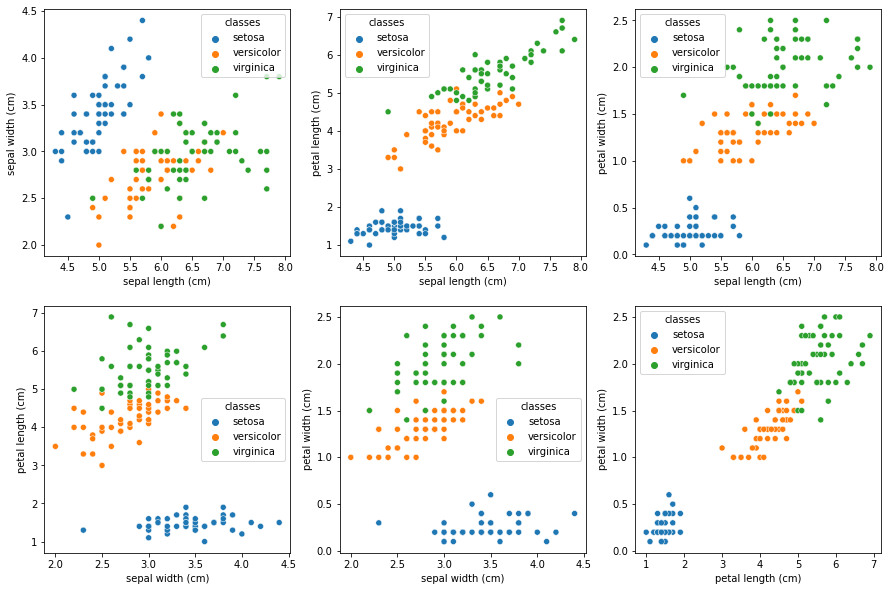

In [54]:
count=1
plt.figure(figsize=[15,10])
for dual in dual_class:
    plt.subplot(2,3,count)
    sns.scatterplot(data=data, x=dual[0], y=dual[1], hue="classes")
    count+=1

plt.show()

## D- Réduction de dimention et visualisation de données

In [71]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [81]:
IrisPCA = PCA(n_components=2).fit_transform(iris.data)
IrisPCA = pd.DataFrame(IrisPCA, columns=["var 1", "var 2"])
IrisPCA["classes"] = iris.target_names[iris.target]
IrisPCA

var 1     var 2    classes
0   -2.684126  0.319397     setosa
1   -2.714142 -0.177001     setosa
2   -2.888991 -0.144949     setosa
3   -2.745343 -0.318299     setosa
4   -2.728717  0.326755     setosa
..        ...       ...        ...
145  1.944110  0.187532  virginica
146  1.527167 -0.375317  virginica
147  1.764346  0.078859  virginica
148  1.900942  0.116628  virginica
149  1.390189 -0.282661  virginica

[150 rows x 3 columns]

<AxesSubplot:xlabel='var 1', ylabel='var 2'>

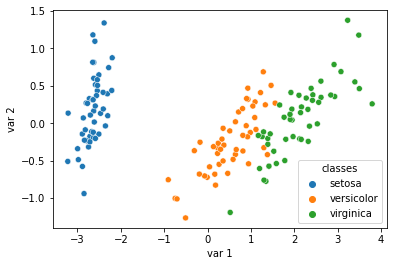

In [82]:
sns.scatterplot(data=IrisPCA, x="var 1", y="var 2", hue="classes")

In [84]:
IrisLDA = LinearDiscriminantAnalysis(n_components=2).fit(iris.data, iris.target
).transform(iris.data)
IrisLDA = pd.DataFrame(IrisLDA, columns=["var 1", "var 2"])
IrisLDA["classes"] = iris.target_names[iris.target]
IrisLDA

var 1     var 2    classes
0    8.061800  0.300421     setosa
1    7.128688 -0.786660     setosa
2    7.489828 -0.265384     setosa
3    6.813201 -0.670631     setosa
4    8.132309  0.514463     setosa
..        ...       ...        ...
145 -5.645003  1.677717  virginica
146 -5.179565 -0.363475  virginica
147 -4.967741  0.821141  virginica
148 -5.886145  2.345091  virginica
149 -4.683154  0.332034  virginica

[150 rows x 3 columns]

<AxesSubplot:xlabel='var 1', ylabel='var 2'>

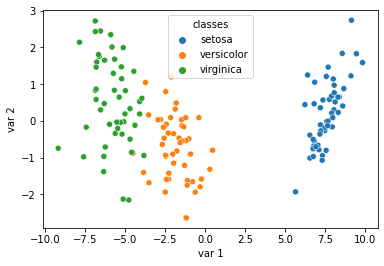

In [85]:
sns.scatterplot(data=IrisLDA, x="var 1", y="var 2", hue="classes")